In [1]:
!pip install sqlalchemy psycopg2-binary pandas ipython-sql > /dev/null 2>&1

In [2]:
from sqlalchemy import create_engine
import pandas as pd

In [3]:
user = "sy91dhb"
password = "g5t49ao"
host = "178.156.142.230"
port = "5432"
db = "hd64m1ki"

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}")

In [4]:
def display_df(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
        display(df)

## Sneak Peak at the Data

In [5]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items LIMIT 10;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
0,24434644,None,comment,mastax,2020-09-10 18:38:22,AMD has said in the past that the GPUs will be available before the new consoles. I&#x27;d expect very limited availability sometime early November. CPUs maybe a bit earlier and a bit better availability.,24433817.0,None,None,NaN,None,None
1,24434645,None,comment,scns,2020-09-10 18:38:27,"They look pretty good, check out the benchmarks:\n<a href=""https:&#x2F;&#x2F;www.anandtech.com&#x2F;show&#x2F;15578&#x2F;cloud-clash-amazon-graviton2-arm-against-intel-and-amd"" rel=""nofollow"">https:&#x2F;&#x2F;www.anandtech.com&#x2F;show&#x2F;15578&#x2F;cloud-clash-amazon-grav...</a>",24433529.0,None,None,NaN,None,None
2,24434646,None,comment,MurMan,2020-09-10 18:38:30,"I&#x27;m a San Diego resident that was falsely accused of a serious offense a few years ago. Surveillance footage from a restaurant saved me from prosecution.<p>I know that this is a minority opinion, but I&#x27;m in favor of cameras in public places. There will always be the potential for abuse even with strong restrictions, but I think the benefits are worth it.",24433668.0,"[24435100, 24435050, 24435762, 24434868, 24435830, 24434872, 24434815, 24437634, 24435055, 24435903, 24435203]",None,NaN,None,None
3,24434647,None,comment,macrael,2020-09-10 18:38:31,"10 years ago (!) Instapaper changed its tune and started requiring emails for new accounts. Before it had not required emails (just usernames) and even didn&#x27;t require passwords, and after living with that for years Marco decided to switch back to the more traditional form.<p><a href=""https:&#x2F;&#x2F;blog.instapaper.com&#x2F;post&#x2F;2318776738"" rel=""nofollow"">https:&#x2F;&#x2F;blog.instapaper.com&#x2F;post&#x2F;2318776738</a><p>It&#x27;s interesting to think that times may have changed and that people are hesitant to give out their email addresses anymore, but you are giving up some real benefits by leaving it out.",24433090.0,None,None,NaN,None,None
4,24434648,None,comment,whateveracct,2020-09-10 18:38:34,"I think plenty of people will just wear masks in public in general going forward. There&#x27;s really barely any downside. If anything, hiding my face in public &amp; making me less approachable is worth it without the health benefits!",24434621.0,"[24436800, 24435419]",None,NaN,None,None
5,24434649,True,story,kvrichard,2020-09-10 18:38:36,None,NaN,None,https://medium.com/human-centered-thinking-switzerland/communication-for-designers-ddbaae0df62a,1.0,Communication For Designers – When communication is conflated with “sales pitch”,None
6,24434650,None,comment,edumucelli,2020-09-10 18:38:41,"One more than &quot;good&quot;, actually phenomenal thing about LetsEncrypt from my experience is their community. It is pure gold. People are super helpful in the <a href=""https:&#x2F;&#x2F;community.letsencrypt.org&#x2F;"" rel=""nofollow"">https:&#x2F;&#x2F;community.letsencrypt.org&#x2F;</a> forum. I had issues on setting it up and lots of people got involved and helped me out, the responsiveness, the cordiality, that is high quality &quot;support&quot; that no money can pay.",24430260.0,None,None,NaN,None,None
7,24434651,None,comment,gotostatement,2020-09-10 18:38:42,nice work!,24434165.0,None,None,NaN,None,None
8,24434652,None,comment,fl0wrini,2020-09-10 18:38:43,"Haha! Using Thoreau&#x27;s essays to defend rioters and looters plus criminals being killed by &quot;racist policing...&quot; Welcome to the internet, where the real problem is. A place where one criminal&#x27;s death (2.9e-10 of the population) can be glorified and shared as fuel to spark outrage amongst entire cities to destroy innocent people&#x27;s lives and homes.",24427724.0,[24435969],None,NaN,None,None
9,24434653,None,comment,chrisjs96,2020-09-10 18:38:46,It&#x27;s not healthy long term though because humans have to exchange bacteria and get sick.,24434554.0,[24434728],None,NaN,None,None


In [6]:
display_df(pd.read_sql("SELECT * FROM hacker_news.users LIMIT 10;", engine))

,id,created,karma,about,submitted
0,_------------_,2018-10-30 22:25:25,5,None,"[18723436, 18710285, 18341881]"
1,_-----_,2022-12-07 19:45:14,38,None,"[34353215, 34346450, 34314090, 34277524, 34262511, 34259647, 34239938, 34236652, 34236445, 34235992, 34199795, 34137505, 34114262, 34105849, 33945079, 33945054, 33926931, 33915446, 33915425]"
2,_--,2016-08-27 21:06:13,-1,None,"[12390950, 12390899, 12373932]"
3,_---____--_--,2022-03-17 12:35:53,6,None,[30710444]
4,_--_,2014-08-02 11:52:04,-7,None,"[10919437, 8668545, 8349770, 8335037]"
5,_--_----_--_,2011-08-09 00:17:37,5,just wandering around,"[3057854, 2936170, 2881969, 2861960]"
6,_--__--__,2020-02-24 17:36:53,21,None,"[41506632, 41207475, 33171311, 31927691, 31927690, 29008735, 25444819, 22407983]"
7,_--___-___,2019-07-09 20:49:22,11,None,"[24152556, 23797608, 22321065, 22239248, 21973585, 21970978, 21714827, 21696737, 21576081, 20867986, 20748802]"
8,_-_-_-,2013-10-18 00:43:28,-20,,"[6569743, 6569721, 6569642, 6569580, 6569556, 6569529, 6569497, 6569491, 6568948]"
9,_-_-_-_,2015-02-10 08:08:56,12,,"[9204764, 9204535, 9105003, 9088165]"


## Stories and comments

In [37]:
display_df(pd.read_sql("SELECT type, count(*) FROM hacker_news.items GROUP BY type;", engine))

,type,count
0,comment,35731362
1,job,17001
2,poll,2113
3,pollopt,14721
4,story,5351748


### What are jobs?

In [39]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items WHERE type='job' LIMIT 3;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
0,5600012,None,job,jaf12duke,2013-04-24 06:28:51,"At 42Floors we still don’t have traditional job titles. As our company has grown, we keep attracting more entrepreneurs who themselves have never cared about job titles. We’re now at 14 people, and we still don’t really have any hierarchy in the company; so there is not really a need to embrace a lot of formal organization.<p>A little while ago, we did implement some processes to keep creative anarchy and functional teamwork in balance. But hierarchy and job titles still didn’t emerge.<p>In fact, the only reason we have job titles on our open positions is that the rest of the world kind of expects them; but once you get here, we don’t really care. We’re a startup. Everyone wears multiple hats. Smart people will do awesome stuff if given the freedom to figure it out.<p>We’d love for you to come check us out. If you want to write Ruby or Backbone.js, or manage a sales pipeline or talk commercial real estate, we might have a job title that’s right for you.<p>http://42floors.com/jobs<p>42Floors\nCreating the world's easist way to search for office space.",None,None,None,1.0,"Job titles, shmob titles",None
1,3700018,None,job,None,2012-03-13 19:41:48,None,None,None,None,NaN,None,None
2,6050035,None,job,londont,2013-07-16 05:32:23,"About us:<p>+ We&#x27;re building the future of payroll. If you love solving un-sexy, foundational problems that affect millions of people, we&#x27;d love to talk with you. Current payroll products haven&#x27;t changed in decades and customers deserve better.<p>+ Our founders are second time entrepreneurs from Stanford who have had two prior exits. We&#x27;re hungry to build something truly great and we&#x27;re in this for the long haul.<p>+ We&#x27;re funded by Y Combinator, Google Ventures, and some of the most prominent CEOs in Silicon Valley (Yelp, Yammer, Box, Dropbox, Parse, salesforce and more).<p>+ Most importantly, our company values are here: https:&#x2F;&#x2F;zenpayroll.com&#x2F;about.<p>--------------------------------------------------------------------------------<p>Things we&#x27;re looking for:<p>+ Experience with Rails | Backbone.js | CoffeeScript | MySQL is a plus but not a pre-requisite.<p>+ Interest in using a test driven development process. We also pair part of the time.<p>+ Interest in building user-facing and core-backend features, as well as being an active part of the design process.<p>+ Desire to understand the customer perspective. All members of our team are builders and it&#x27;s important everyone understands the pain point we&#x27;re solving.<p>--------------------------------------------------------------------------------<p>Perks:<p>+ You&#x27;ll be a core member of our team as we grow the company. As a result, you&#x27;ll receive a competitive salary + significant equity stake.<p>+ Housing stipend if you live near the office, three meals a day, company retreats, gym&#x2F;sports club stipend, dream work set-up, and more -- including copious espressos brewed by one of our co-founders. People are the foundation of our company and we make sure they know they&#x27;re valued.<p>--------------------------------------------------------------------------------<p>Above all, we&#x27;re looking for individuals who are yearning to do the best work of their lives. You&#x27;ll be amply rewarded for the work you do.<p>--------------------------------------------------------------------------------<p>To apply, send a note to jobs [at] zenpayroll [dot] com and include your LinkedIn, GitHub, and&#x2F;or any project pages.<p>This job is located in SoMa, San Francisco, CA. You must be local or willing to relocate (we&#x27;ll cover the cost).",None,None,None,1.0,ZenPayroll (YC W12) is hiring Rails engineers to help make delightful payroll,None


### What are polls?

In [40]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items WHERE type='poll' LIMIT 3;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
0,2400020,None,poll,None,2011-04-02 16:01:37,None,None,None,None,NaN,None,NaN
1,800047,None,poll,RiderOfGiraffes,2009-09-02 14:15:12,"Following on from the raw question and its link to some text of explanation, \nhttp://news.ycombinator.com/item?id=799934\nI've remember I can create a poll ...",None,"[800155, 800101]",None,12.0,"Poll: Horizontal, Vertical, Mixed, Other?",2.0
2,550110,None,poll,khangtoh,2009-04-07 03:10:04,"Just wondering how many applicants are planning to move to San Francisco or Denver/Colorado to start up your dream regardless getting accepted into YC/TechStars?<p>We are in the process of selling our house and planning to move out west end of April. We'll be driving cross country from Indiana! Maybe we'll blog along our way using our IPhones!<p>I heard Colorado has a tech scene brewing, so we're considering that as well.",None,"[550356, 550406]",None,4.0,Poll: Move to SF or Colorado?,2.0


In [41]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items WHERE type='pollopt' LIMIT 3;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
0,5900000,None,pollopt,will_brown,2013-06-18 16:56:27,Facebook Email,None,None,None,0,None,None
1,5900001,None,pollopt,will_brown,2013-06-18 16:56:27,Facebook Hardware,None,None,None,0,None,None
2,5900002,None,pollopt,will_brown,2013-06-18 16:56:27,Other,None,None,None,1,None,None


In [7]:
print("Number of stories:", pd.read_sql("SELECT count(*) FROM hacker_news.items WHERE type='story';", engine).iloc[0, 0])

Number of stories: 5351748


In [8]:
print("Number of comments:", pd.read_sql("SELECT count(*) FROM hacker_news.items WHERE type='comment';", engine).iloc[0, 0])

Number of comments: 35731362


In [61]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items WHERE type='story' AND by IS NULL AND title IS NOT NULL LIMIT 10;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants


In [15]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items WHERE type='story' AND score IS NULL LIMIT 10;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
0,41383253,True,story,None,2024-08-28 20:27:04,None,None,None,None,None,None,None
1,40535013,None,story,None,2024-05-31 14:40:18,None,None,None,None,None,None,None
2,39787362,None,story,None,2024-03-22 04:02:23,None,None,None,None,None,None,None
3,39787374,None,story,None,2024-03-22 04:05:13,None,None,None,None,None,None,None
4,8241435,None,story,None,2014-08-29 08:07:39,None,None,None,None,None,None,None
5,39837663,None,story,None,2024-03-27 11:20:11,None,None,None,None,None,None,None
6,40933749,None,story,None,2024-07-11 05:45:29,None,None,None,None,None,None,None
7,39697004,None,story,None,2024-03-13 20:26:07,None,None,None,None,None,None,None
8,40434377,True,story,None,2024-05-21 22:41:25,None,None,None,None,None,None,None
9,39697055,None,story,None,2024-03-13 20:30:30,None,None,None,None,None,None,None


In [20]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items WHERE type='story' AND score IS NULL AND title IS NOT NULL LIMIT 10;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants


In [21]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items WHERE type='story' AND score IS NOT NULL AND title IS NULL LIMIT 10;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
0,13753887,True,story,_cv7i,2017-02-28 14:21:27,None,None,None,None,1,None,None
1,13356490,True,story,Perados,2017-01-09 14:27:41,None,None,"[13356871, 13356905, 13356860, 13356518, 13356789, 13356721, 13356940, 13356955, 13356930, 13356867, 13356901, 13356780, 13357055, 13356735, 13356879, 13357150, 13357023, 13356943]",None,22,None,None
2,13706876,True,story,RKoutnik,2017-02-22 16:48:46,None,None,"[13707261, 13707313]",None,12,None,None
3,14056765,True,story,oskarth,2017-04-07 04:04:51,None,None,"[14057019, 14056927, 14057010]",None,30,None,None
4,14462227,True,story,yeukhon,2017-06-01 18:11:40,None,None,"[14462660, 14462268, 14462473, 14462342, 14462890, 14464354, 14463558, 14463190, 14462246, 14463588]",None,3,None,None
5,12293003,True,story,MollyR,2016-08-15 21:06:32,None,None,"[12294696, 12294565]",None,19,None,None
6,13565872,True,story,_g2lm,2017-02-04 06:04:20,None,None,"[13566063, 13566017, 13566085, 13566002, 13566006]",None,10,None,None
7,12716825,True,story,drewrv,2016-10-16 05:03:49,None,None,"[12716854, 12717635, 12717158, 12716877, 12717496, 12718510, 12717730, 12716902, 12718518, 12716852, 12718639, 12717509, 12716927, 12716941, 12718204, 12716937, 12716888, 12717248, 12717489, 12716966, 12717613, 12718362, 12717912, 12716887, 12716897, 12719004, 12716896, 12719211, 12718345, 12718631, 12721885, 12718366, 12718006, 12716978, 12718081, 12718333, 12719078, 12717009, 12717245, 12718881, 12719414, 12716904, 12717720, 12718533, 12719430, 12716875, 12716923, 12717742, 12718741, 12717669, 12716857, 12716860, 12717828, 12716832, 12718902, 12717075, 12717586, 12717010, 12716853, 12717145, 12717045, 12717596, 12717277, 12718163]",None,463,None,None
8,13967891,True,story,scholles,2017-03-27 15:20:00,None,None,[14010541],None,3,None,None
9,12921154,True,story,bringking,2016-11-10 15:29:25,None,None,"[12921285, 12921300, 12921291, 12921260, 12921313]",None,5,None,None


In [18]:
display_df(pd.read_sql("SELECT * FROM hacker_news.items WHERE type='comment' AND text IS NULL LIMIT 10;", engine))

,id,dead,type,by,time,text,parent,kids,url,score,title,descendants
0,41583295,None,comment,None,2024-09-18 18:59:45,None,41583224,None,None,None,None,None
1,41783401,None,comment,None,2024-10-09 01:52:43,None,41782898,None,None,None,None,None
2,40135264,None,comment,None,2024-04-23 19:19:41,None,40134674,None,None,None,None,None
3,41034026,None,comment,None,2024-07-22 14:17:30,None,41033705,None,None,None,None,None
4,40884685,None,comment,None,2024-07-05 18:53:44,None,40884356,None,None,None,None,None
5,29516954,None,comment,None,2021-12-10 23:55:49,None,29514110,None,None,None,None,None
6,40384916,None,comment,None,2024-05-17 01:09:49,None,40384880,None,None,None,None,None
7,40384918,None,comment,None,2024-05-17 01:09:54,None,40384489,None,None,None,None,None
8,40384933,None,comment,None,2024-05-17 01:12:01,None,40384081,None,None,None,None,None
9,40384934,None,comment,None,2024-05-17 01:12:02,None,40384838,None,None,None,None,None


## Distribution of scores

In [9]:
df_scores = pd.read_sql("SELECT score FROM hacker_news.items WHERE type='story';", engine)

In [14]:
print("Number of stories with null scores:", df_scores['score'].isnull().sum())

Number of null values in df_scores: 235541


In [35]:
hist = df_scores['score'].value_counts().sort_index()
with pd.option_context('display.max_rows', 30):
    display(hist.reset_index())

,score,count
0,-1.0,1
1,0.0,1453
2,1.0,2324020
3,2.0,1034541
4,3.0,484385
...,...,...
1877,4489.0,1
1878,4549.0,1
1879,5710.0,1
1880,5771.0,1


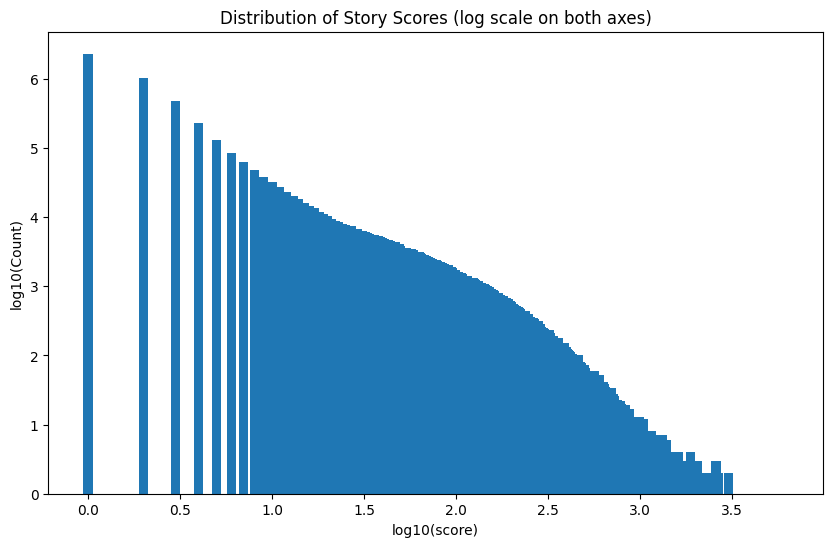

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out non-positive scores to avoid log issues
hist_positive = hist[hist.index > 0]

# Use only positive scores
scores = hist_positive.index.values
log_counts = np.log10(hist_positive.values)

plt.figure(figsize=(10, 6))
plt.bar(np.log10(scores), log_counts, width=0.05)
plt.xlabel('log10(score)')
plt.ylabel('log10(Count)')
plt.title('Distribution of Story Scores (log scale on both axes)')
plt.show()

## Users

In [43]:
print("Number of users:", pd.read_sql("SELECT count(*) FROM hacker_news.users;", engine).iloc[0, 0])

Number of users: 955732


In [44]:
df_karma = pd.read_sql("SELECT karma FROM hacker_news.users;", engine)

In [47]:
hist_karma = df_karma['karma'].value_counts().sort_index()
with pd.option_context('display.max_rows', 30):
    display(hist_karma.reset_index())

,karma,count
0,-247,1
1,-168,1
2,-135,1
3,-130,1
4,-111,1
...,...,...
8349,160239,1
8350,162930,1
8351,199476,1
8352,227883,1


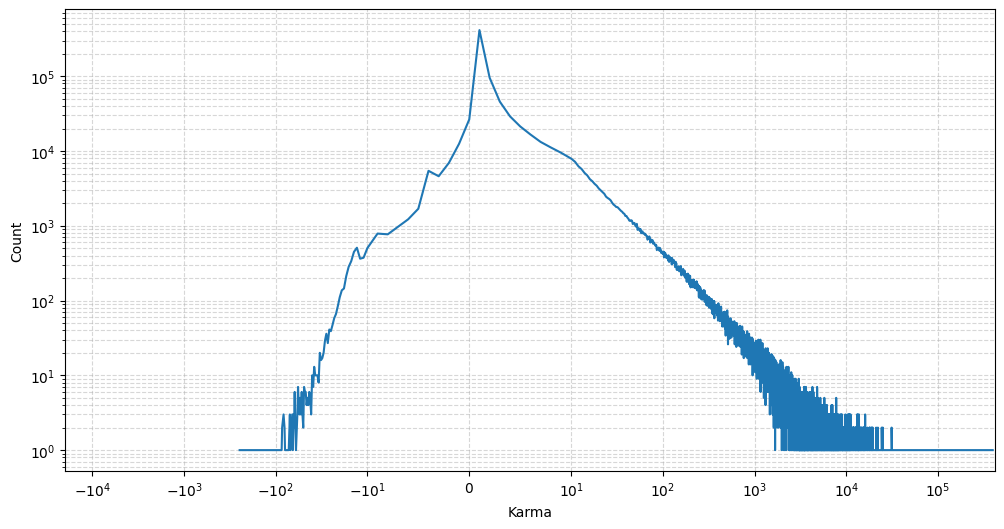

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(hist_karma.index, hist_karma.values)
plt.xlabel('Karma')
plt.ylabel('Count')
plt.yscale('log')
plt.xscale('symlog', linthresh=10)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

In [58]:
df_submitted = pd.read_sql("SELECT array_length(submitted, 1) AS submitted_len FROM hacker_news.users;", engine)

min_len = df_submitted['submitted_len'].min()
max_len = df_submitted['submitted_len'].max()
avg_len = df_submitted['submitted_len'].mean()
num_null = df_submitted['submitted_len'].isnull().sum()

print(f"Min submitted list length: {min_len}")
print(f"Max submitted list length: {max_len}")
print(f"Average submitted list length: {avg_len:.2f}")
print(f"Number of users with null submitted list: {num_null}")

Min submitted list length: 1.0
Max submitted list length: 75542.0
Average submitted list length: 44.27
Number of users with null submitted list: 469


## Text

In [59]:
from sqlalchemy import text
import pandas as pd
from tqdm import tqdm

# Assume you already have an SQLAlchemy engine
# engine = create_engine(...)

# Parameters
chunk_size = 10_000  # adjust as needed
total_rows_query = "SELECT COUNT(*) FROM hacker_news.items"
select_query = "SELECT title FROM hacker_news.items OFFSET :offset LIMIT :limit"

# Count total rows for progress bar
with engine.connect() as conn:
    total_rows = conn.execute(text(total_rows_query)).scalar()

# Initialize result
all_chars = set()

# Read in chunks with tqdm progress bar
for offset in tqdm(range(0, total_rows, chunk_size), desc="Reading titles"):
    with engine.connect() as conn:
        result = conn.execute(
            text(select_query),
            {"offset": offset, "limit": chunk_size}
        )
        rows = result.fetchall()

    # Extract characters
    for row in rows:
        title = row[0]
        if title:
            all_chars.update(title)

# Optional: display or write to file
print("Total unique characters used in titles:", len(all_chars))
print("Characters:", ''.join(sorted(all_chars)))

Reading titles:   6%|▌         | 243/4112 [02:32<40:24,  1.60it/s]  


KeyboardInterrupt: 

In [62]:
from sqlalchemy import text
from tqdm import tqdm

# Result set for all unique characters
all_chars = set()

# SQL query using TABLESAMPLE to take ~5% of the data
sample_query = "SELECT title FROM hacker_news.items TABLESAMPLE SYSTEM (5)"

# Read sampled data
with engine.connect() as conn:
    result = conn.execution_options(stream_results=True).execute(text(sample_query))

    # tqdm doesn't know the size here, so use manual progress if desired
    for row in tqdm(result, desc="Processing sampled titles"):
        title = row[0]
        if title:
            all_chars.update(title)

# Output results
print("Total unique characters used in sampled titles:", len(all_chars))
print("Characters:", ''.join(sorted(all_chars)))

Processing sampled titles: 2054341it [03:02, 11282.95it/s]

Total unique characters used in sampled titles: 1726
Characters: 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¥§©ª«­¯°±²³´µ¶·¹º»½¿ÀÁÂÃÄÆÇÉÍÐÑÓÖ×ØÜßàáâãäåæçèéêëìíîïðñòóôõö÷øùúüýĀāăąćčďĐđēėęěğīİıŁłńōőœŔŕŘřŞşŠšţũūűźżŽžơưșɐəɛʻʼˈ˚ˡˢ̶̮̀́̃̇̉̊ΆΈΌΑΒΓΔΕΖΗΘΙΚΛΜΝΞΟΠΡΣΤΥΦΧΨΩάέήίαβγδεζηθικλμνξοπρςστυφχψωϊόύώЈАБВГДЕЗИЙКЛМНОПРСТУФХЦЧШЫЬЭЯабвгдежзийклмнопрстуфхцчшщъыьэюяіј҉אבגדהוחטיךכלםמןנסעףפצקרשת،؟ءآأؤإئابةتثجحخدذرزسشصضطظعغـفقكلمنهوىيًَُِّْ٠١٢٩ٹپچژکگہیے۰۱۲۳۴۵۶۷۸۹ँंअआइईउएऑऔकखगचछजझटडढणतथदधनपफबभमयरलवशसह़ािीुूेैॉोौ्ॐड़फ़।०३ংওকখগচজটডতদনফবভমরলসহািীুেো্য়ಠರೃആകചഡതനപരറലളവസാിുെോ്กขคงจชซณดตถทนบปผพมยรลวสหอฮัาำิีืุูเแโใไ็่้๊์ကခစညပမါာူံ့း္ႀᐁᐃᐅᐊᐍᐏᐠᐡᐣᐦᐱᑎᑕᑭᑿᒋᒪᒷᓂᓇᓭᔑᔚᔦᵃᵉᵐᵗṇạảẤấầẩẫẬậắặẻẽếỀềểễỆệỉịọỏốồổỗộớờởỡợụủứừửữỰỹ    ​‌‎‏‐‑–—―‘’“”„†•․…  ‪‬′″‹›⁠₂€₹№™←↑→↓↔↵∅−√∞∩≠≡≥⋅⋆⋙⌘⌚⍼⏱⏲␣─│║█▲▶●☄☆☯☺♥♫⚽✌❀❣❤⸻、。〈〉「」【】あいうぇおがきくげこごさしすそたちっつてでとなにねのはびふまみめもょりるれをんァアィイウェエオカガキクグコサザシジスズタダチッツテデトドナネノバパビピフブベペホボマミメュョラリルレワンヴヶ・ー一三上下不与专世丘业东丝两丨个中丸主丽久么义之乌乐习书了事二互五亚亞交产京人什介从付代令以仪件价任份仿企伊休会传位佐体何作佳使來供価保信修假做停

In [ ]:
from sqlalchemy import text
from tqdm import tqdm

# Step 1: Get total number of rows in the table
with engine.connect() as conn:
    total_rows = conn.execute(text("SELECT COUNT(*) FROM hacker_news.items WHERE type='story'")).scalar()

# Step 2: Define sample size (5% of total)
sample_fraction = 0.05
sample_size = int(total_rows * sample_fraction)

# Step 3: Query approximately 5% of rows using random sampling
# Note: This scans the full table, but gives good randomness
sample_query = text(f"""
    SELECT title FROM hacker_news.items
    WHERE random() < :fraction
    LIMIT :limit
""")

# Step 4: Execute and track progress
all_chars = set()

with engine.connect() as conn:
    result = conn.execution_options(stream_results=True).execute(
        sample_query,
        {"fraction": sample_fraction, "limit": sample_size}
    )
    for row in tqdm(result, desc="Processing sampled titles", total=sample_size):
        title = row[0]
        if title:
            all_chars.update(title)

# Final output
print("Total unique characters used in sampled titles:", len(all_chars))
print("Characters:", ''.join(sorted(all_chars)))

In [63]:
from sqlalchemy import text
from tqdm import tqdm
from collections import Counter

# Step 1: Get total number of rows with type='story'
with engine.connect() as conn:
    total_rows = conn.execute(
        text("SELECT COUNT(*) FROM hacker_news.items WHERE type = 'story'")
    ).scalar()

# Step 2: Define sample size (5% of total)
sample_fraction = 0.05
sample_size = int(total_rows * sample_fraction)

# Step 3: Sample query with filter on type
sample_query = text("""
    SELECT title FROM hacker_news.items
    WHERE type = 'story' AND random() < :fraction
    LIMIT :limit
""")

# Step 4: Execute and count characters
char_counter = Counter()

with engine.connect() as conn:
    result = conn.execution_options(stream_results=True).execute(
        sample_query,
        {"fraction": sample_fraction, "limit": sample_size}
    )
    for row in tqdm(result, desc="Processing sampled titles", total=sample_size):
        title = row[0]
        if title:
            char_counter.update(title)

# Step 5: Sort characters by count
sorted_chars = sorted(char_counter.items(), key=lambda x: -x[1])

# Step 6: Display results
print(f"Total unique characters: {len(sorted_chars)}")

# Print counts (top 20 preview)
print("\nTop 20 characters by frequency:")
for ch, count in sorted_chars[:20]:
    printable = repr(ch) if ch.isspace() or ord(ch) < 32 else ch
    print(f"{printable}: {count}")

# Print all characters as a block with newline every 100 characters
print("\nAll characters (sorted by frequency):")
char_block = ''.join(ch for ch, _ in sorted_chars)
for i in range(0, len(char_block), 100):
    print(char_block[i:i+100])

Processing sampled titles: 100%|█████████▉| 267185/267587 [00:34<00:00, 7668.40it/s]


Total unique characters: 1754

Top 20 characters by frequency:
' ': 1678520
e: 1025917
o: 748791
a: 688754
t: 679621
i: 663298
n: 637402
r: 603780
s: 570694
l: 368435
c: 285309
d: 278372
h: 265689
u: 265148
p: 210171
g: 208400
m: 203146
f: 159001
y: 152542
w: 130185

All characters (sorted by frequency):
 eoatinrslcdhupgmfywSbkAvTCPMHIDWBNRF:ELG-0O,x12.U'?VY–z)(J’Kj3594q86Q7/[]+$X“”"Zا‘&%ل|#ميروتنب;_دةس
عéف=شكه* а!جαحоеτق…иοειт—нص νıрی`ρ£üсσкزвöá~خлςىηλ€πκثطçμдóئغ@íΣضпΑуàмί»کάυİأы�ΕбγέяΠΤ•ाό{}зã​^şьй·Ο
Κظ­ωΙгร«ンา	र°कءΜδーưآलКчラđेñêน்ΓξΝ﻿ذύèä>Ρיạήीхжस่\नğΛोôảบΔχگ→إφپাΗú×רוグ网РАहώ۹۲θÜีנ！イш′âルடคĐगंāอ¿ÖミệếС
的<ัเס口コП‎ф۱øæăम्トมÇสΥژ۵ตดति‬バキц้ิịờபДБΒपβমΩすקấốッிŞể天ОМВọюζনìōでกยไפ新リ人žமНợে⁣‐å₂ลง，‪דサữ★ộšுகðהÁ│র۰ 
️ब‑„หแวÉウậ宝のГềòŽ品ćổクИ視ëΧद̶লē⁠্̇𝗲ทवא阳ュם业ắメாУự真不
ụớЗő†Θु۷⁢Â№õพ์−用婚科限≠院ש中を最何ใ安ứµù小・エரனФ比美学车ィЭ是克´一アƯদিỰ²
‍ক½ป：э州זל机公胸医ở丰і物語にか好ช无产ơ₹販ペவØ游果îـ式،私ửカ本鞋牌จЕ了©装地מโčशてまΞầभयЛΈट【】۴ºんॉב（）た𝗿𝗼色™फ款加Ə有司店玫琳凯合格整出ネジ购はืผチ財布作
چ↑↓←ブ料ピプřேХ外‏影板器țłẫ文世界服上花意通微テ大钢щ复传淘ח么シャ轉檔訊钱龙ﬁ背包下अडखしりレूくΊ電Тïুち۳जएżϊẠễैच知证がতপ𝘀𝘁情ข√代טお试验盟ủ太ベ山